In [1]:
import pandas as pd
df = pd.read_csv('Advertising.csv')
df = pd.DataFrame(df)
display(df.head())

df.info()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [2]:
#df = df.drop(columns = ['Id'])
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<AxesSubplot:>

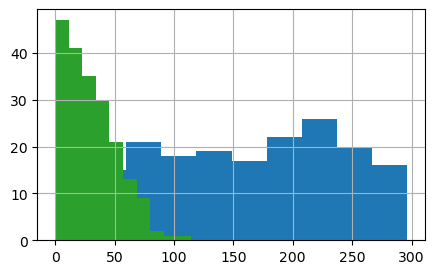

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,3))

df['TV'].hist()
df['Radio'].hist()
df['Newspaper'].hist()

In [4]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [5]:
X = df.drop(columns = ['Sales'])
y = df['Sales']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

import pandas as pd
import numpy as np
y_pre = model.predict(X_test)


y_pre_plot = y_pre
print(y_pre)
y_pre =  {"y_pre" : y_pre}
y_pre = pd.DataFrame(y_pre)


y_test = y_test.values
print(y_test)
y_test_plot = y_test
y_test = {"y_test" : y_test}
y_test = pd.DataFrame(y_test)



df_concat = pd.concat([y_test, y_pre], axis = 0)


[24.3414188   8.42256876 14.45397454 16.65073348 18.28607119 11.17363419
  9.4859653   8.72399324 12.48339634 14.54346931 17.92034707  9.9233996
 11.75496352  6.26234143 23.3379678  11.27347582 15.28043061 18.94382955
 15.90718606  9.3372324  20.61119233 17.18379504  6.16150377 24.02298205
 20.77901787 14.41560371 20.54882494 10.71357476 22.36758075 21.00806067
 22.27536583  5.82101681 15.1279836  19.42969587  9.9594581  17.81760438
  6.1002429  16.63077465 24.20599318 19.09292135 15.81674698 11.85261556
 17.75864584 13.27775877  7.88449759 10.12004121  9.78547672 10.74391207
  9.39017448 20.95022094  9.46377919  8.12917837 16.84271592 21.87420432
 21.51593121 19.87340481 14.57728926 16.70949271 18.30017101 19.0198394
  8.11262804 21.28012256 15.76015334 24.02615292 22.06019778  8.8783338 ]
[25.5  5.7 14.2 20.2 19.8 10.7 11.3  9.4 11.9 15.3 16.6 10.1 12.5  3.2
 24.2 12.3 14.6 17.  16.7 11.  17.8 20.6  6.9 24.4 23.7 16.7 17.6  9.5
 23.2 21.7 20.8  5.9 17.9 18.4  8.8 18.   7.3 16.7 25.4 

66 66 66


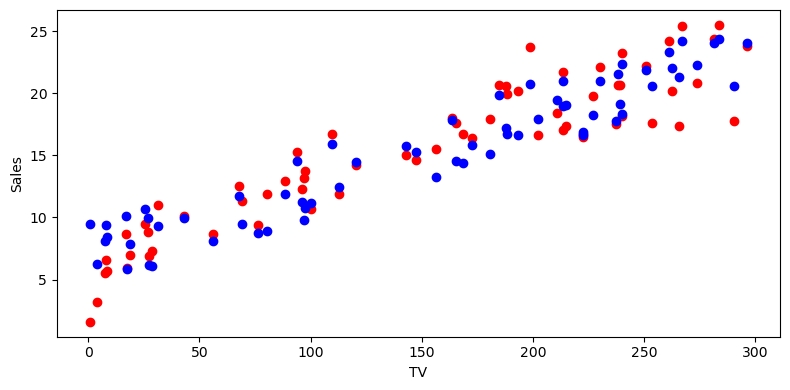

In [10]:
import matplotlib.pyplot as plt
X_test1 = X_test['TV'].values
X_test2 = X_test['Radio'].values
X_test3 = X_test['Newspaper'].values

print(X_test1.size, y_test_plot.size, y_pre_plot.size)

plt.figure(figsize = (8,4))
plt.scatter(X_test1, y_test_plot, color = 'r', label = 'Actual')
plt.scatter(X_test1, y_pre_plot, color = 'b', label = 'Predicted')


plt.xlabel('TV')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()